 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [28]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [382]:
# Reading whale returns
whale_returns=pd.read_csv('whale_returns.csv', parse_dates=True, infer_datetime_format=True)
whale_returns['Date']=pd.to_datetime(whale_returns['Date'])
whale_returns=whale_returns.set_index('Date')
print(whale_returns)

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
...                               ...                 ...   
2019-04-25                  -0.000285           -0.001291   
2019-04-26                   0.008149            0.009162   
2019-04-29                   0.001254            0.002719   
2019-04-30                  -0.001295           -0.002211   
2019-05-01                  -0.005847           -0.001341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-

In [383]:
# Count nulls
whale_returns.isnull().sum(axis=0)

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [384]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [385]:
# Count nulls
whale_returns.isnull().sum(axis=0)

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [386]:
# Reading algorithmic returns
algo_returns=pd.read_csv('algo_returns.csv', parse_dates=True, infer_datetime_format=True)
algo_returns['Date']=pd.to_datetime(algo_returns['Date'])
algo_returns=algo_returns.set_index('Date')
print(algo_returns)

              Algo 1    Algo 2
Date                          
2014-05-28  0.001745       NaN
2014-05-29  0.003978       NaN
2014-05-30  0.004464       NaN
2014-06-02  0.005692       NaN
2014-06-03  0.005292       NaN
...              ...       ...
2019-04-25  0.000682 -0.007247
2019-04-26  0.002981  0.005256
2019-04-29  0.005208  0.002829
2019-04-30 -0.002944 -0.001570
2019-05-01  0.000094 -0.007358

[1241 rows x 2 columns]


In [387]:
# Count nulls
algo_returns.isnull().sum(axis=0)

Algo 1    0
Algo 2    6
dtype: int64

In [388]:
# Drop nulls
algo_returns.dropna(inplace=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [389]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history=pd.read_csv('sp_tsx_history.csv', parse_dates=True, infer_datetime_format=True)
sp_tsx_history['Date']=pd.to_datetime(sp_tsx_history['Date'])
sp_tsx_history=sp_tsx_history.set_index('Date')
sp_tsx_history.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [390]:
# Check Data Types
sp_tsx_history.dtypes

Close    object
dtype: object

In [391]:
# Fix Data Types
sp_tsx_history['Close'] = sp_tsx_history['Close'].str.replace('$', '', regex=True)
sp_tsx_history["Close"]=sp_tsx_history['Close'].str.replace(",", "", regex=True)
sp_tsx_history["Close"]=sp_tsx_history['Close'].astype(float)

sp_tsx_history.dtypes

Close    float64
dtype: object

In [392]:
# Calculate Daily Returns
daily_return=sp_tsx_history.pct_change()
daily_return.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [393]:
# Drop nulls
daily_return.dropna(inplace=True)
daily_return.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [394]:
# Rename `Close` Column to be specific to this portfolio.
daily_return.columns=['S&P Close']
daily_return.head()

,S&P Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [395]:
daily_return.dtypes

S&P Close    float64
dtype: object

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [467]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
return_merged=pd.concat([whale_returns, algo_returns, daily_return], axis=1, join="inner")

return_merged.dropna(inplace=True)
return_merged.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

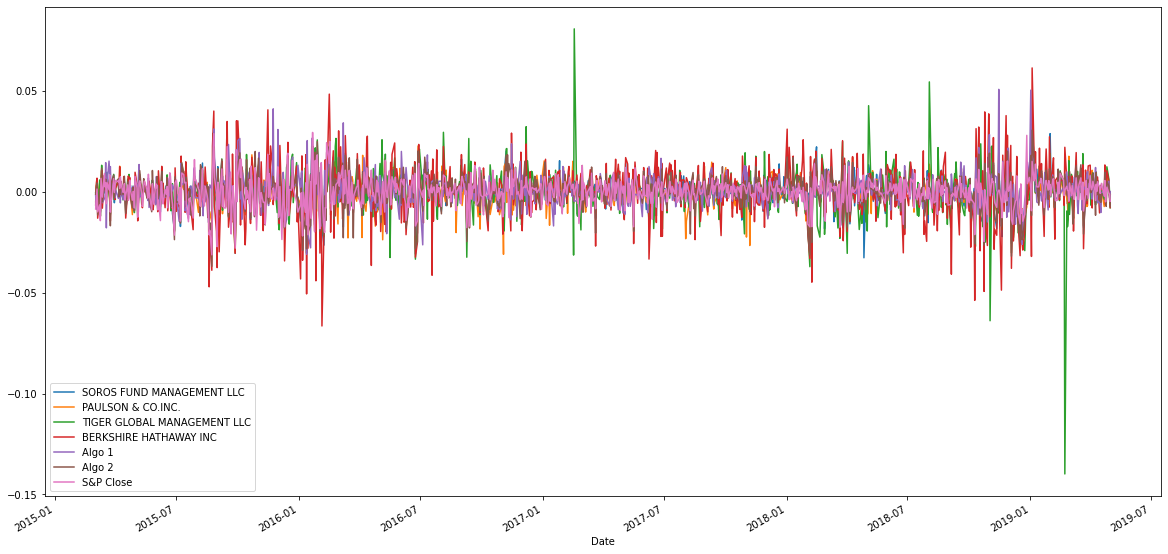

In [406]:
# Plot daily returns of all portfolios
return_merged.plot(figsize=(20,10))


#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

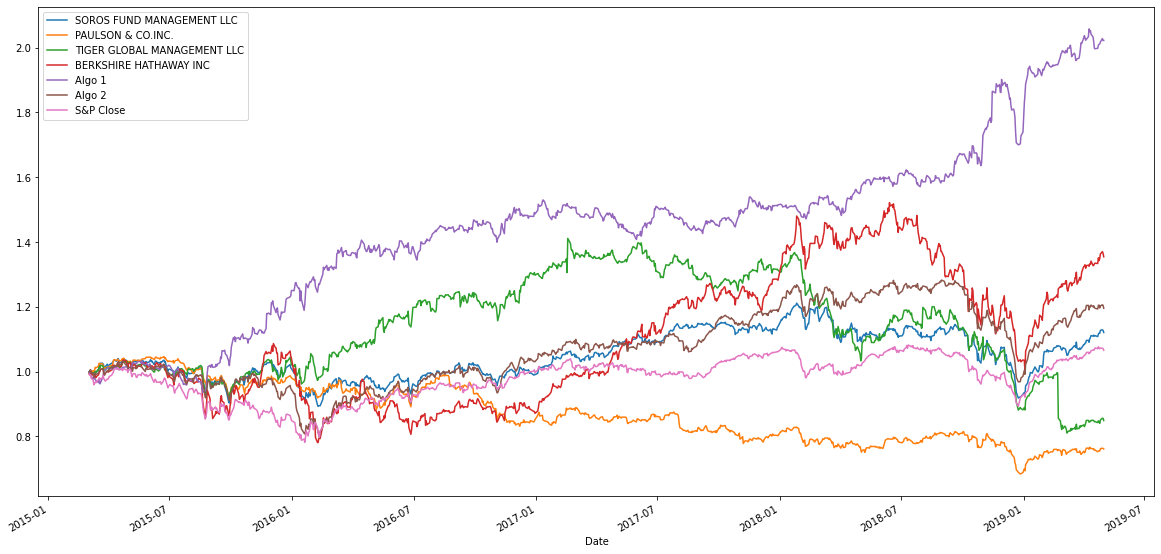

In [407]:
# Calculate cumulative returns of all portfolios
# Plot cumulative returns
return_merged_cumulative=(1+return_merged).cumprod()
return_merged_cumulative.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

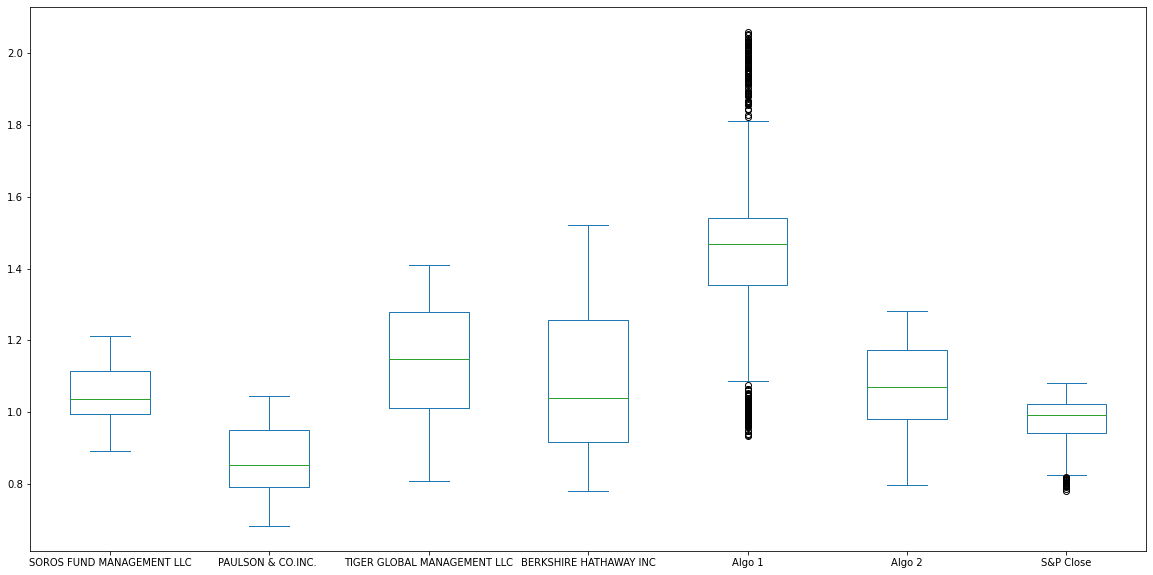

In [401]:
# Box plot to visually show risk
return_merged_cumulative.plot.box(figsize=(20,10))

### Calculate Standard Deviations

In [402]:
# Calculate the daily standard deviations of all portfolios
return_merged_std=return_merged.std()
print(return_merged_std)

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P Close                      0.007034
dtype: float64


### Determine which portfolios are riskier than the S&P TSX 60

In [468]:
# Calculate  the daily standard deviation of S&P TSX 60

# Determine which portfolios are riskier than the S&P TSX 60

    #---it appears that the profies provided are all more risky then the S&P TSX---
    

### Calculate the Annualized Standard Deviation

In [403]:
# Calculate the annualized standard deviation (252 trading days)
annual_std=return_merged_std*252**0.5
print(annual_std)

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P Close                      0.111664
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

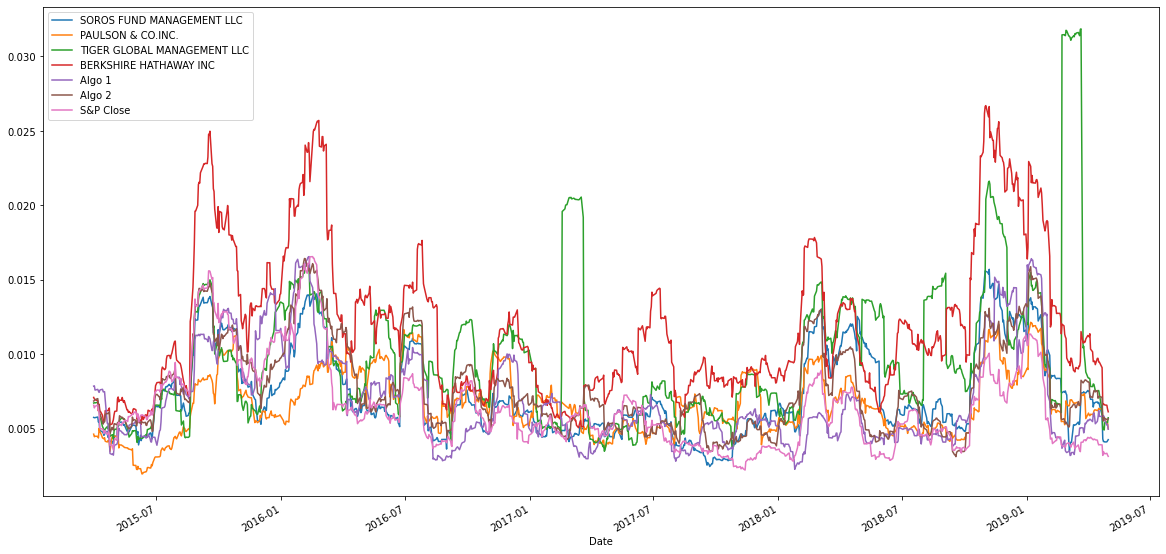

In [469]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
annual_std_21=return_merged.rolling(window=21).std()
# Plot the rolling standard deviation
annual_std_21.plot(figsize=(20,10))

### Calculate and plot the correlation

In [409]:
# Calculate the correlation
all_return_corr=return_merged.corr()

# Display de correlation matrix
all_return_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Close
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P Close,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [470]:
# Calculate covariance of a single portfolio
single_cov=return_merged['TSX'].cov()
# Calculate variance of S&P TSX
tsx_var=return_merged['TSX'].var()
# Computing beta
tsx_beta=single_cov/tsx_var
# Plot beta trend
tsx_beta.plot()

KeyError: 'TSX'

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

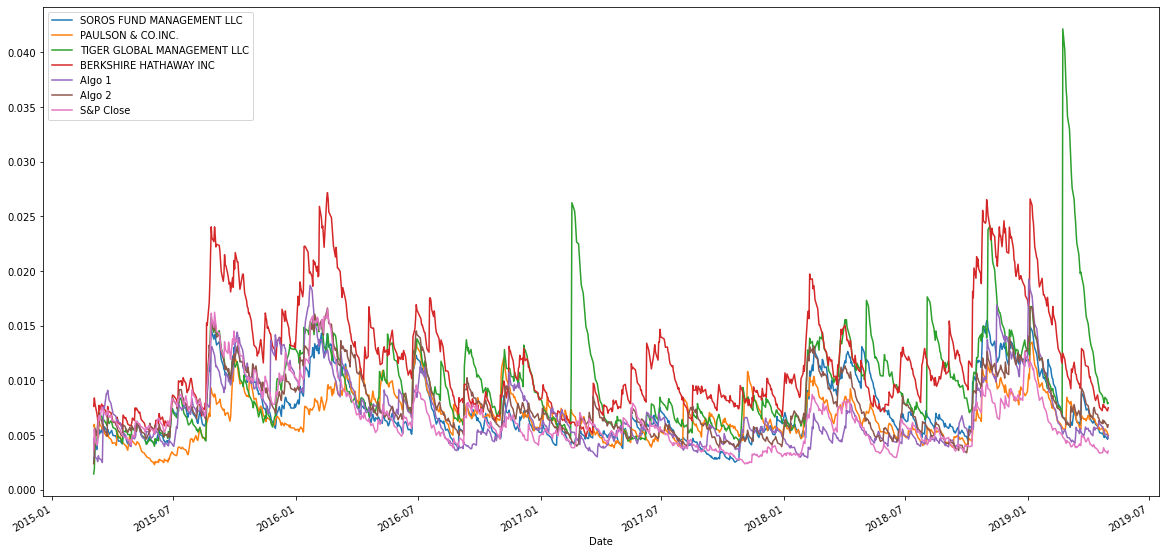

In [413]:
# Use `ewm` to calculate the rolling window
returns_21=return_merged.ewm(span=21,adjust=False).std()
returns_21.plot(figsize=(20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [419]:
# Annualized Sharpe Ratios
merged_sharp=(return_merged.mean()-return_merged['SOROS FUND MANAGEMENT LLC'].mean())*252/return_merged.std()*np.sqrt(252)

<AxesSubplot:>

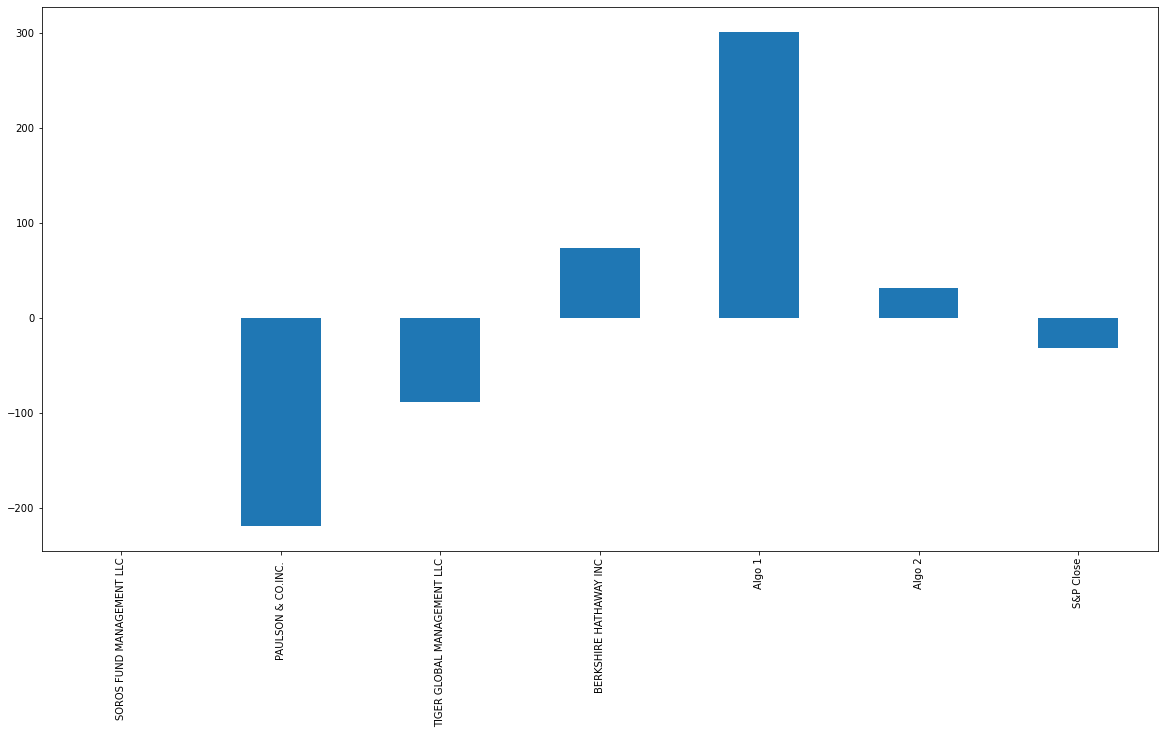

In [420]:
# Visualize the sharpe ratios as a bar plot
merged_sharp.plot.bar(figsize=(20,10))

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [441]:
# Reading data from 1st stock
shop_shopify_stock=pd.read_csv('Shopify_stock.csv', parse_dates=["Date"], infer_datetime_format=True)
shop_shopify_stock=shop_shopify_stock.set_index("Date")
shop_shopify_stock.head()

,Close Shop
Date,
2019-05-22 16:00:00,279.00
2019-05-23 16:00:00,271.62
2019-05-24 16:00:00,275.85
2019-05-28 16:00:00,282.43
2019-05-29 16:00:00,272.68


In [442]:
# Reading data from 2nd stock
micron_stock=pd.read_csv('Micron_Technology_stock.csv', parse_dates=['Date'], infer_datetime_format=True)
micron_stock=micron_stock.set_index("Date")
micron_stock.head()

,Close MU
Date,
2019-05-22 16:00:00,34.73
2019-05-23 16:00:00,33.82
2019-05-24 16:00:00,34.00
2019-05-28 16:00:00,32.94
2019-05-29 16:00:00,33.29


In [443]:
# Reading data from 3rd stock
amd_stock=pd.read_csv('AMD_stock.csv', parse_dates=['Date'], infer_datetime_format=True)
amd_stock=amd_stock.set_index("Date")
amd_stock.head()

,Close AMD
Date,
2019-05-22 16:00:00,27.41
2019-05-23 16:00:00,26.36
2019-05-24 16:00:00,26.44
2019-05-28 16:00:00,29.03
2019-05-29 16:00:00,28.09


In [444]:
# Combine all stocks in a single DataFrame
my_return_merged = pd.concat([micron_stock,amd_stock,shop_shopify_stock], axis=1)

In [445]:
# Reset Date index
my_return_merged.sort_index(inplace=True)
my_return_merged.head()

,Close MU,Close AMD,Close Shop
Date,,,
2019-05-22 16:00:00,34.73,27.41,279.00
2019-05-23 16:00:00,33.82,26.36,271.62
2019-05-24 16:00:00,34.00,26.44,275.85
2019-05-28 16:00:00,32.94,29.03,282.43
2019-05-29 16:00:00,33.29,28.09,272.68


<AxesSubplot:xlabel='Date'>

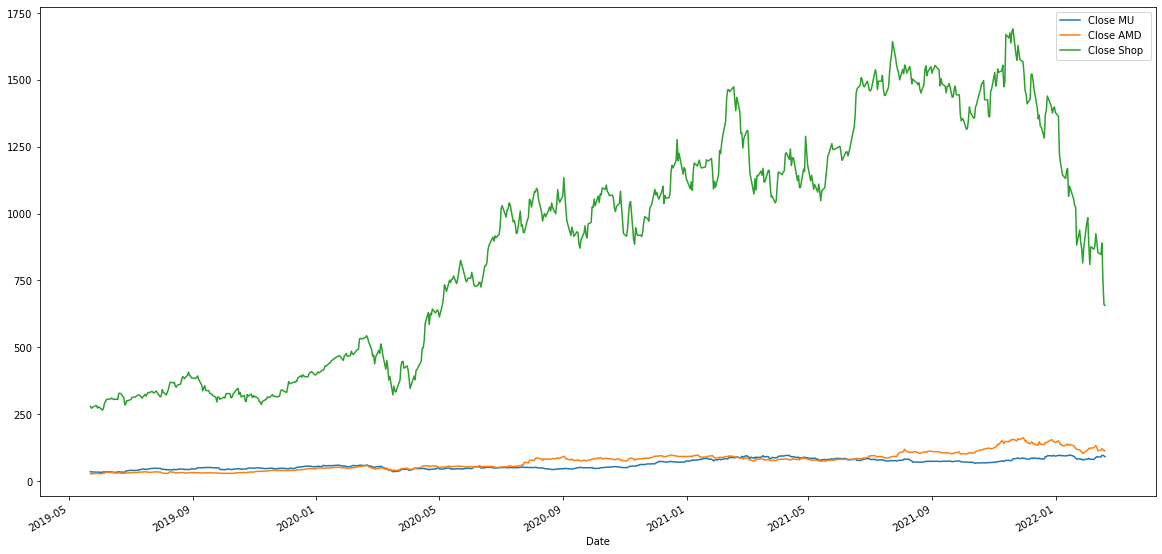

In [446]:
my_return_merged.plot(figsize=(20,10))

In [447]:
# Reorganize portfolio data by having a column per symbol
my_return_merged.columns=['MU', 'AMD', 'SHOP']
my_return_merged.head()

,MU,AMD,SHOP
Date,,,
2019-05-22 16:00:00,34.73,27.41,279.00
2019-05-23 16:00:00,33.82,26.36,271.62
2019-05-24 16:00:00,34.00,26.44,275.85
2019-05-28 16:00:00,32.94,29.03,282.43
2019-05-29 16:00:00,33.29,28.09,272.68


In [448]:
# Calculate daily returns
daily_returns=my_return_merged.pct_change()

# Drop NAs
daily_returns.dropna()
# Display sample data
print(daily_returns)

                           MU       AMD      SHOP
Date                                             
2019-05-22 16:00:00       NaN       NaN       NaN
2019-05-23 16:00:00 -0.026202 -0.038307 -0.026452
2019-05-24 16:00:00  0.005322  0.003035  0.015573
2019-05-28 16:00:00 -0.031176  0.097958  0.023854
2019-05-29 16:00:00  0.010625 -0.032380 -0.034522
...                       ...       ...       ...
2022-02-14 16:00:00  0.001114  0.009631 -0.007670
2022-02-15 16:00:00  0.068329  0.063009  0.049619
2022-02-16 16:00:00  0.000625 -0.031119 -0.160371
2022-02-17 16:00:00 -0.024256 -0.045204 -0.116288
2022-02-18 16:00:00 -0.031260  0.012993 -0.004727

[694 rows x 3 columns]


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [450]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_return=daily_returns.dot(weights)
# Display sample data
portfolio_return.head()

Date
2019-05-22 16:00:00         NaN
2019-05-23 16:00:00   -0.030320
2019-05-24 16:00:00    0.007977
2019-05-28 16:00:00    0.030212
2019-05-29 16:00:00   -0.018759
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [458]:
# Join your returns DataFrame to the original returns DataFrame
all_data=pd.concat([return_merged, my_return_merged], axis=1, join='inner')
all_data.index

DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)

In [459]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
clean_data=all_data.dropna()
clean_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Close,MU,AMD,SHOP
Date,,,,,,,,,,


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [453]:
# Calculate the annualized `std`
portfolio_std=portfolio_return.std()*np.sqrt(252)
portfolio_return.head()

Date
2019-05-22 16:00:00         NaN
2019-05-23 16:00:00   -0.030320
2019-05-24 16:00:00    0.007977
2019-05-28 16:00:00    0.030212
2019-05-29 16:00:00   -0.018759
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

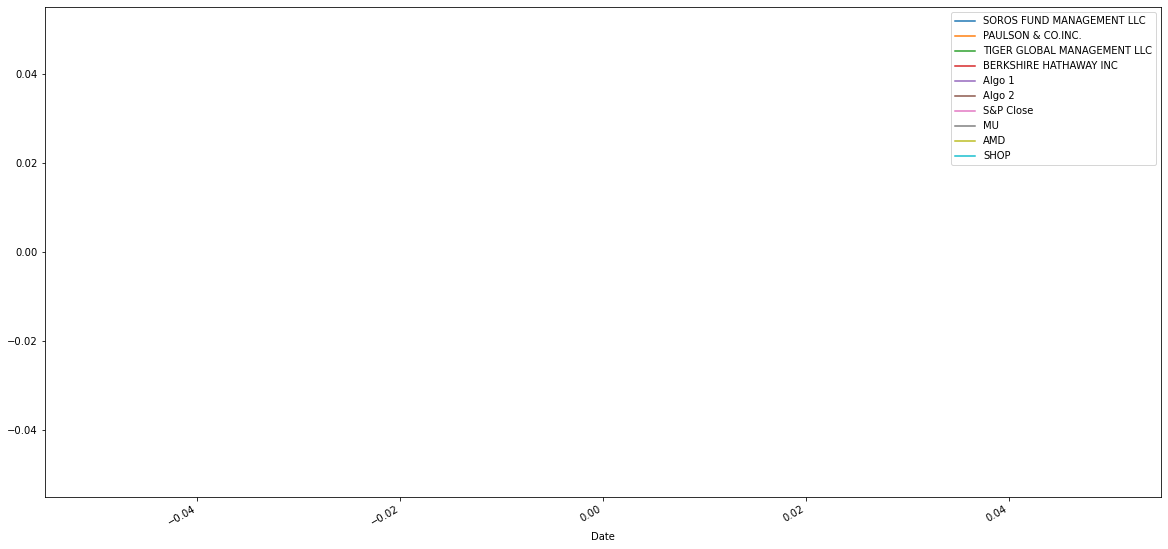

In [460]:
# Calculate rolling standard deviation
std_21_all=clean_data.rolling(window=21).std()
# Plot rolling standard deviation
std_21_all.plot(figsize=(20,10))

### Calculate and plot the correlation

In [464]:
# Calculate and plot the correlation
corr_for_all=return_merged.corr()
corr_for_all

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Close
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P Close,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [466]:
# Calculate and plot Beta
my_tsx=return_merged['TSX'].rolling(window=60).cov(daily_returns)
beta_my_tsx=my_tsx/tsx_var
beta_my_tsx.plot(figsize=(20,10))

KeyError: 'TSX'

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!